# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [7]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = '9c3e287ee55c454796df6dbe3121a729'#os.getenv("NEWS_API_KEY")

In [9]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [12]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [13]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [14]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,text
0,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
1,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.152,0.075,0.773,If youve been watching the crypto markets over...
4,0.0000,0.000,0.000,1.000,Six years after the launch of the Mexico-based...


In [15]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,text
0,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.154510,0.055152,0.018141,0.926717
std,0.326482,0.065729,0.046739,0.077543
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.860500
50%,0.000000,0.050000,0.000000,0.948000
75%,0.396900,0.117000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [17]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.243635,0.082156,0.021219,0.896615
std,0.350801,0.078330,0.047167,0.092644
min,-0.779200,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.838250
50%,0.250000,0.074000,0.000000,0.913000
75%,0.493900,0.132250,0.000000,1.000000
max,0.883400,0.347000,0.239000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum - 0.082156

Q: Which coin had the highest compound score?

A: Ethereum - 0.877900

Q. Which coin had the highest positive score?

A: Ethereum - 0.347000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [29]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [45]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [46]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
tokens = []

for index, row in Bitcoin_df.iterrows():
    tokens.append(tokenizer(row['text']))

Bitcoin_df['tokens'] = tokens
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
2,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
3,0.4404,0.152,0.075,0.773,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
4,0.0000,0.000,0.000,1.000,Six years after the launch of the Mexico-based...,"[six, year, launch, mexicobased, crypotcurrenc..."


In [47]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
tokens = []

for index, row in Ethereum_df.iterrows():
    tokens.append(tokenizer(row['text']))

Ethereum_df['tokens'] = tokens
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [48]:
from collections import Counter
from nltk import ngrams

In [84]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
Bitcoin_tokens = []

for index, row in Bitcoin_df.iterrows():
    Bitcoin_tokens = Bitcoin_tokens + row['tokens']

Bitcoin_bigram_counts = Counter(ngrams(Bitcoin_tokens, n=2))
Bitcoin_bigram_counts.items() 

dict_items([(('visahas', 'partnered'), 1), (('partnered', 'cryptocurrency'), 1), (('cryptocurrency', 'startup'), 2), (('startup', 'blockfi'), 2), (('blockfi', 'offer'), 1), (('offer', 'first'), 1), (('first', 'reward'), 1), (('reward', 'credit'), 1), (('credit', 'card'), 3), (('card', 'pay'), 1), (('pay', 'bitcoin'), 1), (('bitcoin', 'rather'), 1), (('rather', 'cash'), 1), (('cash', 'worth'), 1), (('worth', 'applying'), 1), (('applying', 'unless'), 1), (('unless', 'youre'), 1), (('youre', 'extremely'), 1), (('extremely', 'bullish'), 1), (('bullish', 'char'), 1), (('char', 'november'), 3), (('november', 'absolutely'), 1), (('absolutely', 'massive'), 1), (('massive', 'twomonth'), 1), (('twomonth', 'rally'), 1), (('rally', 'bitcoin'), 1), (('bitcoin', 'passed'), 3), (('passed', 'first'), 1), (('first', 'time'), 2), (('time', 'next'), 1), (('next', 'day'), 1), (('day', 'soared'), 1), (('soared', 'even'), 1), (('even', 'higher'), 1), (('higher', 'reaching'), 1), (('reaching', 'price'), 1), 

In [79]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
Ethereum_tokens = []

for index, row in Ethereum_df.iterrows():
    Ethereum_tokens = Ethereum_tokens + row['tokens']

Ethereum_bigram_counts = Counter(ngrams(Ethereum_tokens, n=2))
Ethereum_bigram_counts.items()

dict_items([(('file', 'photo'), 3), (('photo', 'representation'), 6), (('representation', 'ethereum'), 3), (('ethereum', 'virtual'), 3), (('virtual', 'currency'), 10), (('currency', 'standing'), 2), (('standing', 'pc'), 2), (('pc', 'motherboard'), 2), (('motherboard', 'seen'), 2), (('seen', 'illustration'), 5), (('illustration', 'picture'), 2), (('picture', 'february'), 2), (('february', 'reutersdado'), 2), (('reutersdado', 'ruvicillustrationlondon'), 3), (('ruvicillustrationlondon', 'reuters'), 3), (('reuters', 'char'), 3), (('char', 'file'), 2), (('char', 'london'), 3), (('london', 'reuters'), 3), (('reuters', 'digital'), 1), (('digital', 'currency'), 3), (('currency', 'ethereum'), 1), (('ethereum', 'xrp'), 2), (('xrp', 'soared'), 1), (('soared', 'monday'), 1), (('monday', 'gaining'), 1), (('gaining', 'momentum'), 1), (('momentum', 'bitcoin'), 1), (('bitcoin', 'powered'), 1), (('powered', 'towards'), 1), (('towards', 'alltime'), 1), (('alltime', 'highfile'), 1), (('highfile', 'photo'

In [80]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [81]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(Bitcoin_tokens)

[('char', 98),
 ('bitcoin', 84),
 ('reuters', 71),
 ('currency', 40),
 ('photo', 33),
 ('virtual', 33),
 ('taken', 31),
 ('illustration', 28),
 ('seen', 27),
 ('reutersdado', 27)]

In [82]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(Ethereum_tokens)

[('char', 96),
 ('ethereum', 50),
 ('bitcoin', 40),
 ('ha', 28),
 ('reuters', 21),
 ('blockchain', 16),
 ('cryptocurrency', 14),
 ('asset', 14),
 ('price', 14),
 ('currency', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

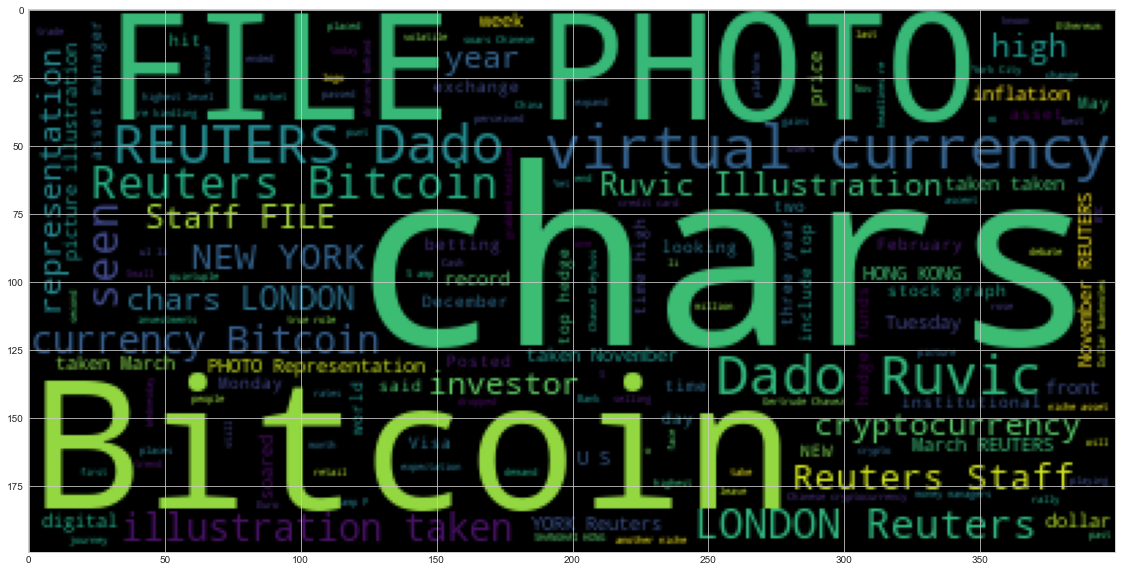

In [88]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
Bitcoin_text = ''

for index, row in Bitcoin_df.iterrows():
    Bitcoin_text = Bitcoin_text + row['text']

Bitcoin_wc = WordCloud().generate(Bitcoin_text)
plt.imshow(Bitcoin_wc)

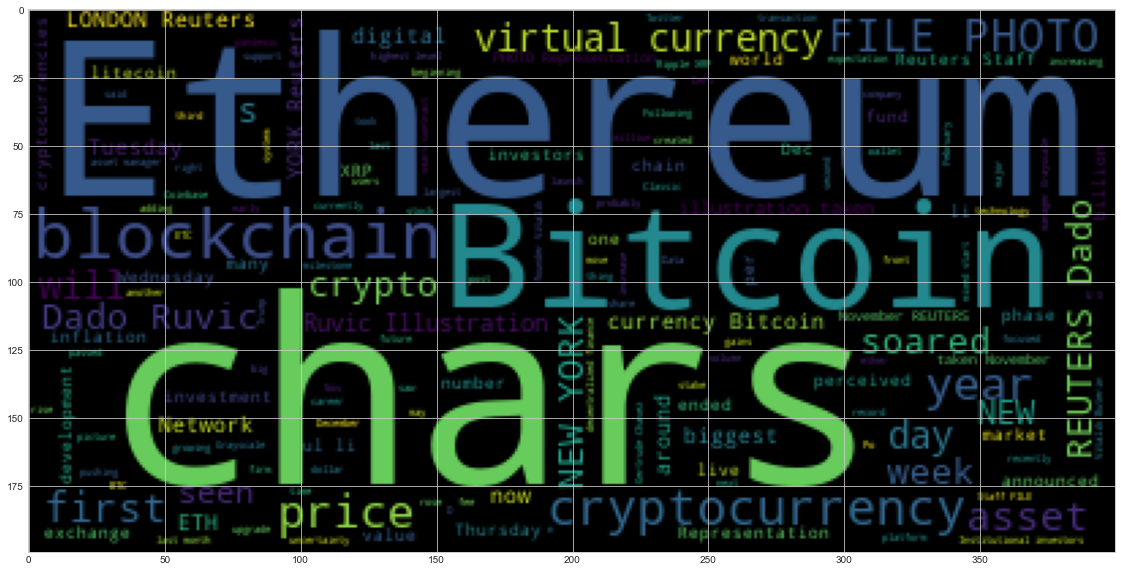

In [89]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
Ethereum_text = ''

for index, row in Ethereum_df.iterrows():
    Ethereum_text = Ethereum_text + row['text']

Ethereum_wc = WordCloud().generate(Ethereum_text)
plt.imshow(Ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [91]:
import spacy
from spacy import displacy

In [92]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [93]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [94]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
Bitcoin_text

'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars]If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has clos

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [95]:
# Render the visualization
# YOUR CODE HERE!
Bitcoin_doc = nlp(Bitcoin_text)
displacy.render(Bitcoin_doc, style='ent')


In [101]:
# List all Entities
# YOUR CODE HERE!
for ent in Bitcoin_doc.ents:
    print(ent.text+' '+ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
Grayson Blackmon / PERSON
One CARDINAL
the year DATE
the day DATE
Twitter ORG
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin HarperBusiness ORG
BBC News ORG
Bitcoin GPE
above $17,000 MONEY
12,800 MONEY
three-year DATE
Bitcoin GPE
this week DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
RE

---

## Ethereum NER

In [99]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
Ethereum_text

'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the se

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [100]:
# Render the visualization
# YOUR CODE HERE!
Ethereum_doc = nlp(Ethereum_text)
displacy.render(Ethereum_doc, style='ent')

In [102]:
# List all Entities
# YOUR CODE HERE!
for ent in Ethereum_doc.ents:
    print(ent.text+' '+ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
15, 2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hedera ORG
Syrians N